# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/listings.csv.gz')

## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Total missing values per column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5241
Length: 79, dtype: int64

Percentage of missing values per column:
calendar_updated                                100.000000
license                                          83.094908
host_neighbourhood                               66.816644
neighbourhood                                    57.091217
neighborhood_overview                            57.091217
                      

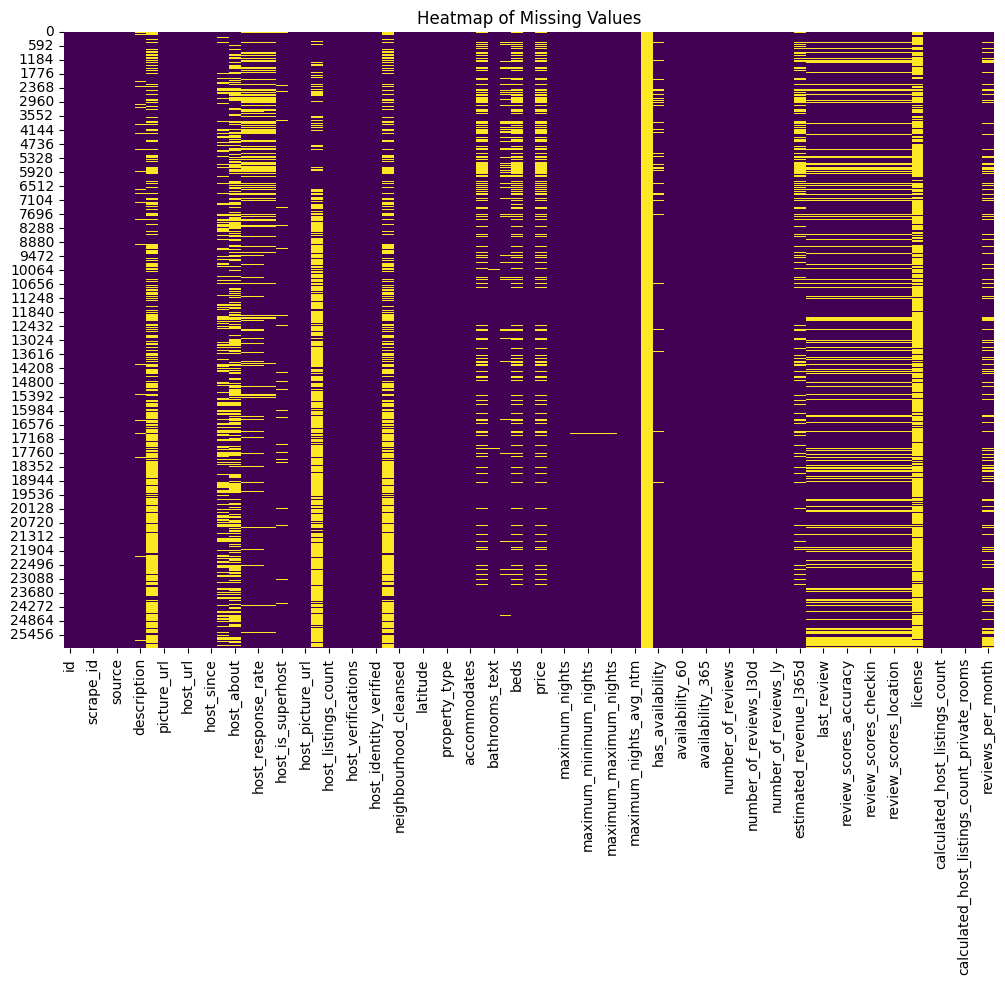

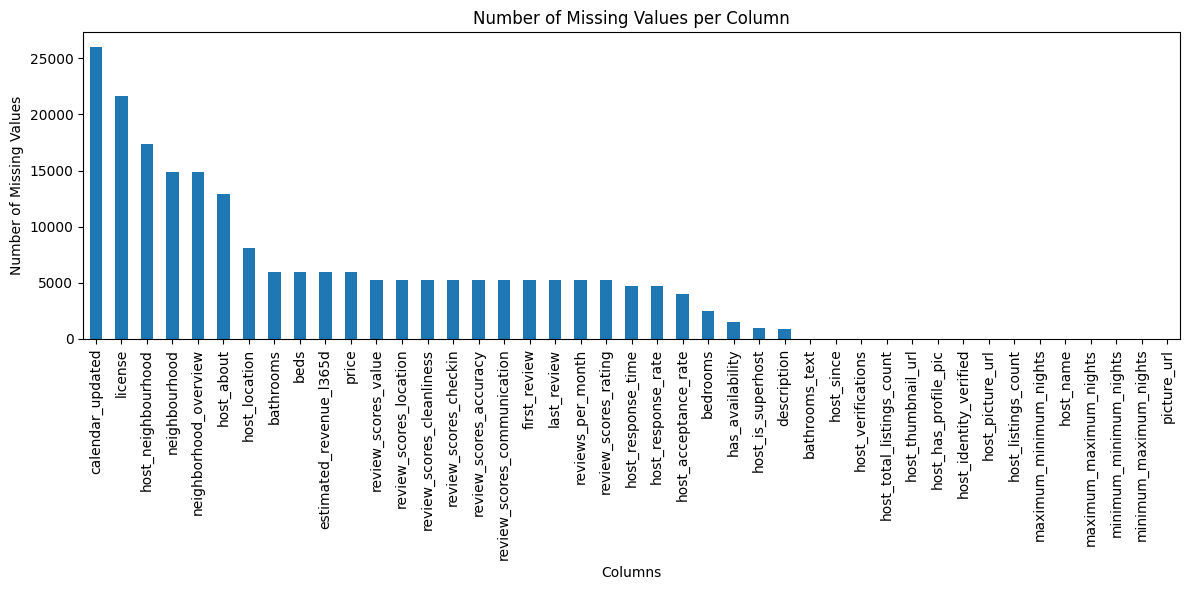

In [10]:
# Count the total number of missing values in each column
missing_values_count = df.isnull().sum()
print("Total missing values per column:")
print(missing_values_count)

# Calculate the percentage of missing values per column and sort them
missing_values_percentage = (missing_values_count / len(df)) * 100
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)
print("\nPercentage of missing values per column:")
print(missing_values_percentage)

# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Create a bar chart that shows the number of missing values per column
missing_values_count[missing_values_count > 0].sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Number of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. The columns with the most missing values are calendar_updated, license, and host_neighbourhood. These stand out clearly as the tallest bars in the chart.

2. calendar_updated is crucial because outdated availability can directly impact bookings and revenue. Missing values in neighbourhood also create problems, since location is a key driver of pricing and customer decisions.

3. host_neighbourhood can be safely ignored because more reliable location columns exist. Other descriptive host attributes, like host_about, may also be dropped if missingness is high and not central to business analysis.

## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [15]:
df = df.drop(['host_neighbourhood', 'host_about', 'host_name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26004 entries, 0 to 26003
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26004 non-null  int64  
 1   listing_url                                   26004 non-null  object 
 2   scrape_id                                     26004 non-null  int64  
 3   last_scraped                                  26004 non-null  object 
 4   source                                        26004 non-null  object 
 5   name                                          26004 non-null  object 
 6   description                                   25104 non-null  object 
 7   neighborhood_overview                         11158 non-null  object 
 8   picture_url                                   26002 non-null  object 
 9   host_id                                       26004 non-null 

### ✍️ Your Response: 🔧
1. I dropped host_neighbourhood, host_about, and host_name.

2. host_neighbourhood is redundant because location is already captured in more reliable neighborhood columns. host_about is unstructured text with many missing values, making it difficult to analyze. host_name is just an identifier and does not influence pricing, availability, or customer decisions.

3. Keeping these columns could introduce unnecessary noise, increase data processing complexity, and mislead analysts into overvaluing irrelevant details. They could also make models less efficient by adding uninformative variables.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [18]:
# Convert 'price' to numeric, coercing errors
df['price'] = pd.to_numeric(df['price'].str.replace('[$,]', '', regex=True), errors='coerce')

# Fill missing 'price' with median
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

# Fill missing 'last_review' with "No reviews yet"
df['last_review'].fillna('No reviews yet', inplace=True)

# Verify the changes
print("Missing values after filling:")
print(df[['price', 'last_review']].isnull().sum())

Missing values after filling:
price          0
last_review    0
dtype: int64


### ✍️ Your Response: 🔧
1. I cleaned price and last_review.

2. For price, I used the median to replace missing values, since it avoids the influence of extreme outliers and keeps values realistic. For last_review, I filled missing entries with "No reviews yet", making it clear that the property simply hasn’t been reviewed.

3. Filling price with the median may mask true variation if many listings are missing values. Marking last_review as "No reviews yet" could mislead if some data was missing due to reporting errors rather than lack of reviews.


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [22]:
# Remove '%' and convert to float
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float)

# Verify the conversion
print(df['host_response_rate'].describe())

count    21276.000000
mean        91.301842
std         21.464446
min          0.000000
25%         96.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64


### ✍️ Your Response: 🔧
1. I fixed the host_response_rate column.

2. I removed the % sign from each value and converted the column from text (object) into a numeric type (float).

3. This allows the response rate to be used in calculations, summaries, and visualizations, which is essential for comparing hosts and including the variable in predictive models.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [23]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows}")

# Check for duplicate IDs
duplicate_ids = df['id'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

# Remove duplicate rows if found
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"\n{duplicate_rows} duplicate rows removed.")

# If IDs are supposed to be unique, you might want to investigate duplicate IDs further
# or decide how to handle them based on the data's origin and expected structure.
# For this task, we will only remove exact duplicate rows.

# Verify that duplicate rows are gone
print(f"Number of rows after removing duplicates: {len(df)}")

Number of exact duplicate rows: 0
Number of duplicate IDs: 0
Number of rows after removing duplicates: 26004


### ✍️ Your Response: 🔧 🔧
1. Based on the output from the code, I did not find any duplicate rows.

2. Since I did not find any duplicate rows, I did not drop anything.

3. Duplicate listing can confuse customers, and may also cause booking problems. In addition, they can inflate key metrics like revenue, occupancy, or number of listings, leading Airbnb teams to make poor business decisions

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [24]:
df.to_csv("cleaned_airbnb_data.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. The trickiest part was discovering “numeric-looking” fields stored as text (e.g., price, host_response_rate) and how that silently broke summaries and plots. I was also surprised by how much missingness clustered in a few metadata fields, which forced clear keep/drop decisions.

2. I kept fields essential to business use-cases (price, review metrics, availability, location), fixed types and imputed sensible values (median for prices, flags like “No reviews yet” for dates). I dropped redundant or low-signal columns (host_neighbourhood, host_about, host_name) to reduce noise and modeling drag.

3. Pricing and revenue analysts can now trust aggregates and models because prices are numeric, duplicates are removed, and outliers are bounded—leading to better price recommendations and occupancy forecasts. Hosts and ops teams also get cleaner maps and dashboards without broken visuals from missing or malformed fields.

4. I’d examine MNAR patterns (e.g., whether missing reviews correlate with low demand), and I would also analyse the correlation of other columns with the target veriable.

5. This aligns with Strategic Market Analytics by producing reliable inputs for demand forecasting and price optimization. It also supports Risk Analytics & Operational Resilience by enforcing data quality controls that reduce decision risk and make downstream processes (transforms, models) more robust.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [25]:
!jupyter nbconvert --to html "assignment_06_AlhinaiAlmuhanna.ipynb"

[NbConvertApp] Converting notebook assignment_06_AlhinaiAlmuhanna.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 635418 bytes to assignment_06_AlhinaiAlmuhanna.html
